In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf

In [35]:
startup=pd.read_csv("50_Startups.csv")
startup

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [36]:
startup.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [37]:
startup.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [38]:
startup.isna().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [39]:
startup.corr()

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


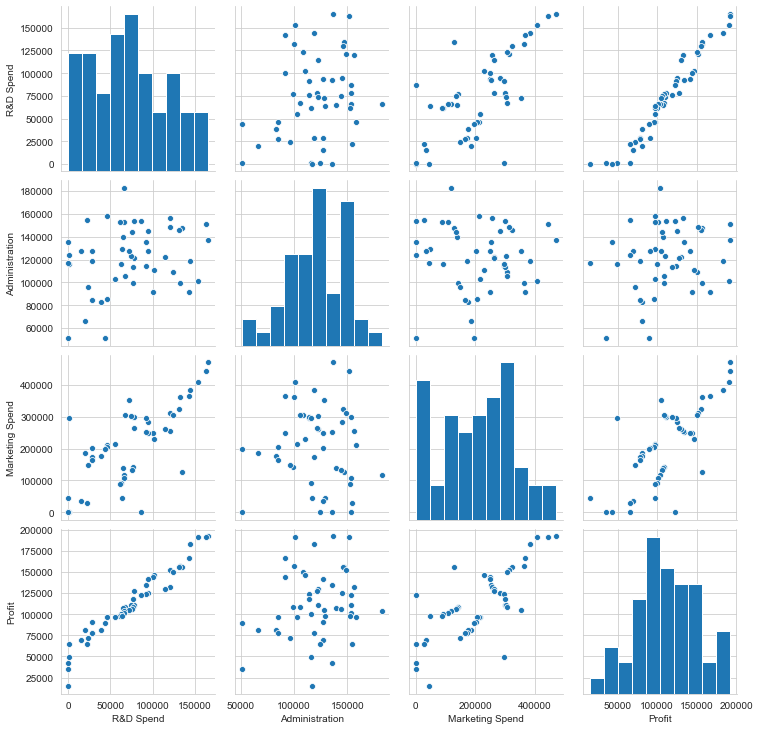

In [40]:
sns.set_style(style='whitegrid')
sns.pairplot(startup)

In [41]:
startup1=startup.rename(columns={'R&D Spend':'RDS','Administration':'ADM','Marketing Spend':'MARS'})
startup1

,RDS,ADM,MARS,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [42]:
del startup1['State']
startup1

,RDS,ADM,MARS,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94
5,131876.90,99814.71,362861.36,156991.12
6,134615.46,147198.87,127716.82,156122.51
7,130298.13,145530.06,323876.68,155752.60
8,120542.52,148718.95,311613.29,152211.77
9,123334.88,108679.17,304981.62,149759.96


In [71]:
import statsmodels.formula.api as smf
model = smf.ols('Profit ~ RDS+ADM+MARS',data=startup1).fit()

In [44]:
model.params

Intercept    50122.192990
RDS              0.805715
ADM             -0.026816
MARS             0.027228
dtype: float64

In [45]:
print(model.tvalues, '\n', model.pvalues)

Intercept     7.626218
RDS          17.846374
ADM          -0.525507
MARS          1.655077
dtype: float64 
 Intercept    1.057379e-09
RDS          2.634968e-22
ADM          6.017551e-01
MARS         1.047168e-01
dtype: float64


In [46]:
(model.rsquared,model.rsquared_adj)

(0.9507459940683246, 0.9475337762901719)

In [47]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Wed, 30 Dec 2020   Prob (F-statistic):           4.53e-30
Time:                        14:15:05   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.012e+04   6572.353      7.626      0.000    3.69e+04    6.34e+04
RDS            0.8057      0.045     17.846      0.000       0.715       0.897
ADM           -0.0268      0.051     -0.526      0.602      -0.130       0.076
MARS           0.0272      0.016      1.655      0.105      -0.006       0.060
==============================================================================
Omnibus:                       14.838   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.442
Skew:                          -0.949   Prob(JB):                     2.21e-05
Kurtosis:                       5.586   Cond. No.                     1.40e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Simple linear reg models

In [48]:
ml_adm=smf.ols('Profit~ADM',data=startup1).fit()
print(ml_adm.tvalues, '\n', ml_adm.pvalues)

Intercept    3.040044
ADM          1.419493
dtype: float64 
 Intercept    0.003824
ADM          0.162217
dtype: float64


In [49]:
ml_adm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.040
Model:                            OLS   Adj. R-squared:                  0.020
Method:                 Least Squares   F-statistic:                     2.015
Date:                Wed, 30 Dec 2020   Prob (F-statistic):              0.162
Time:                        14:15:05   Log-Likelihood:                -599.63
No. Observations:                  50   AIC:                             1203.
Df Residuals:                      48   BIC:                             1207.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   7.697e+04   2.53e+04      3.040      0.004    2.61e+04    1.28e+05
ADM            0.2887      0.203      1.419      0.162      -0.120       0.698
==============================================================================
Omnibus:                        0.126   Durbin-Watson:                   0.099
Prob(Omnibus):                  0.939   Jarque-Bera (JB):                0.110
Skew:                           0.093   Prob(JB):                        0.947
Kurtosis:                       2.866   Cond. No.                     5.59e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.59e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [50]:
ml_mars=smf.ols('Profit~MARS',data=startup1).fit()
print(ml_mars.tvalues,'\n',ml_mars.pvalues)

Intercept    7.808356
MARS         7.802657
dtype: float64 
 Intercept    4.294735e-10
MARS         4.381073e-10
dtype: float64


In [51]:
ml_mars.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.559
Model:                            OLS   Adj. R-squared:                  0.550
Method:                 Least Squares   F-statistic:                     60.88
Date:                Wed, 30 Dec 2020   Prob (F-statistic):           4.38e-10
Time:                        14:15:05   Log-Likelihood:                -580.18
No. Observations:                  50   AIC:                             1164.
Df Residuals:                      48   BIC:                             1168.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept       6e+04   7684.530      7.808      0.000    4.46e+04    7.55e+04
MARS           0.2465      0.032      7.803      0.000       0.183       0.310
==============================================================================
Omnibus:                        4.420   Durbin-Watson:                   1.178
Prob(Omnibus):                  0.110   Jarque-Bera (JB):                3.882
Skew:                          -0.336   Prob(JB):                        0.144
Kurtosis:                       4.188   Cond. No.                     4.89e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.89e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [52]:
ml_am=smf.ols('Profit~ADM+MARS',data=startup1).fit()
print(ml_am.tvalues, '\n',ml_am.pvalues)

Intercept    1.142741
ADM          2.467779
MARS         8.281039
dtype: float64 
 Intercept    2.589341e-01
ADM          1.729198e-02
MARS         9.727245e-11
dtype: float64


In [53]:
ml_am.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.610
Model:                            OLS   Adj. R-squared:                  0.593
Method:                 Least Squares   F-statistic:                     36.71
Date:                Wed, 30 Dec 2020   Prob (F-statistic):           2.50e-10
Time:                        14:15:05   Log-Likelihood:                -577.13
No. Observations:                  50   AIC:                             1160.
Df Residuals:                      47   BIC:                             1166.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.022e+04   1.77e+04      1.143      0.259   -1.54e+04    5.58e+04
ADM            0.3237      0.131      2.468      0.017       0.060       0.588
MARS           0.2488      0.030      8.281      0.000       0.188       0.309
==============================================================================
Omnibus:                        6.584   Durbin-Watson:                   1.279
Prob(Omnibus):                  0.037   Jarque-Bera (JB):                6.524
Skew:                          -0.512   Prob(JB):                       0.0383
Kurtosis:                       4.443   Cond. No.                     1.30e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.3e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# VIF VALUES

In [73]:
rsq_rds = smf.ols('RDS~ADM+MARS',data=startup1).fit().rsquared
vif_rds=1/(1-rsq_rds)

rsq_adm = smf.ols('ADM~RDS+MARS',data=startup1).fit().rsquared
vif_adm=1/(1-rsq_adm)

rsq_mars = smf.ols('MARS~ADM+RDS',data=startup1).fit().rsquared
vif_mars=1/(1-rsq_mars)

d1={'Variables':['RDS','ADM','MARS'],'VIF':[vif_rds,vif_adm,vif_mars]}
Vif_frame = pd.DataFrame(d1)
Vif_frame

,Variables,VIF
0,RDS,2.468903
1,ADM,1.175091
2,MARS,2.326773


#Q-Q Plot

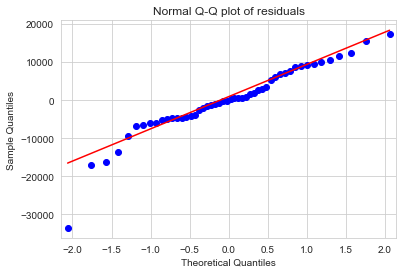

In [56]:
import statsmodels.api as sm
qqplot = sm.qqplot(model.resid,line='q')
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [57]:
list(np.where(model.resid>5))

[array([ 1,  2,  3,  8, 10, 11, 12, 13, 16, 19, 20, 25, 28, 30, 34, 35, 36,
        37, 38, 40, 41, 42, 43, 44, 45], dtype=int64)]

COOKS DISTANCE

In [58]:
model_influence = model.get_influence()
(c, _) = model_influence.cooks_distance

<ipython-input-59-9a95dcb4c4e5>:2: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(np.arange(len(startup1)),np.round(c, 3))


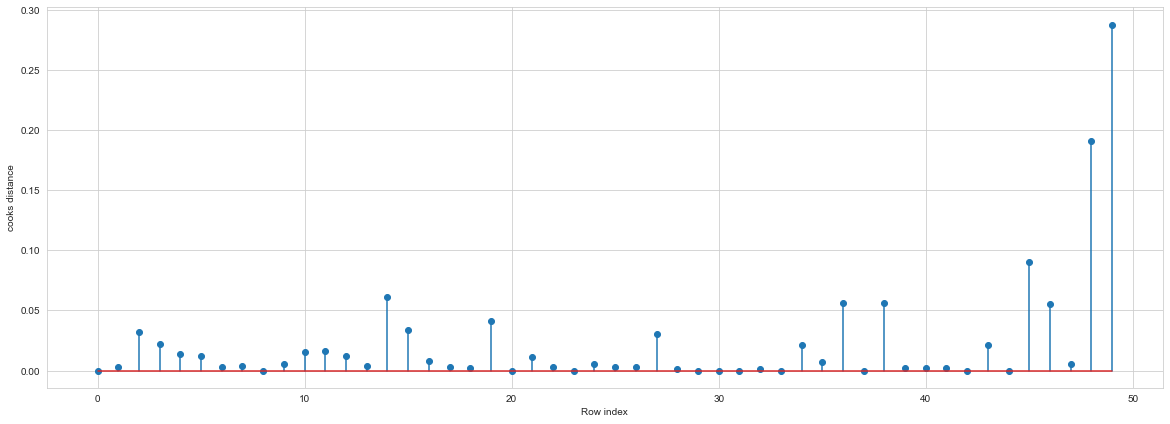

In [59]:
fig = plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(startup1)),np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('cooks distance')
plt.show()

In [60]:
(np.argmax(c),np.max(c))

(49, 0.28808229275432634)

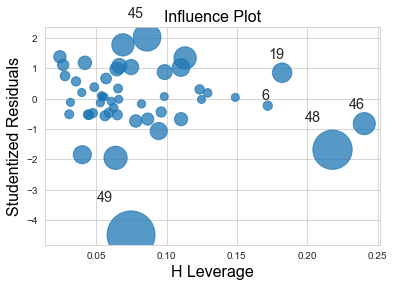

In [61]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model)
plt.show()

In [62]:
k = startup1.shape[1]
n = startup1.shape[0]
leverage_cutoff = 3*((k+1)/n)
leverage_cutoff

0.30000000000000004

In [63]:
startup1[startup1.index.isin([49,48])]

,RDS,ADM,MARS,Profit
48,542.05,51743.15,0.00,35673.41
49,0.00,116983.80,45173.06,14681.40


In [64]:
startup1.head()

,RDS,ADM,MARS,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94


In [65]:
startup_new = pd.read_csv('50_Startups.csv')

In [74]:
startup2=startup_new.drop(startup_new.index[[48,49]],axis=0).reset_index()
startup2
startupp=startup2.rename(columns={'R&D Spend':'RDS','Administration':'ADM','Marketing Spend':'MARS'})
startupp

,index,RDS,ADM,MARS,State,Profit
0,0,165349.20,136897.80,471784.10,New York,192261.83
1,1,162597.70,151377.59,443898.53,California,191792.06
2,2,153441.51,101145.55,407934.54,Florida,191050.39
3,3,144372.41,118671.85,383199.62,New York,182901.99
4,4,142107.34,91391.77,366168.42,Florida,166187.94
5,5,131876.90,99814.71,362861.36,New York,156991.12
6,6,134615.46,147198.87,127716.82,California,156122.51
7,7,130298.13,145530.06,323876.68,Florida,155752.60
8,8,120542.52,148718.95,311613.29,New York,152211.77
9,9,123334.88,108679.17,304981.62,California,149759.96


In [75]:
startupp=startupp.drop(['index',"State"],axis=1)

In [76]:
startupp

,RDS,ADM,MARS,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94
5,131876.90,99814.71,362861.36,156991.12
6,134615.46,147198.87,127716.82,156122.51
7,130298.13,145530.06,323876.68,155752.60
8,120542.52,148718.95,311613.29,152211.77
9,123334.88,108679.17,304981.62,149759.96


build model

In [81]:
final_model_mars=smf.ols('Profit~RDS+MARS',data=startupp).fit()

In [82]:
(final_model_mars.rsquared,final_model_mars.aic)

(0.9609119875752479, 994.886442942941)

In [83]:
final_model_adm=smf.ols('Profit~RDS+ADM',data=startupp).fit(

In [100]:
(final_model_adm.rsquared,final_model_adm.aic)

(0.9653589410274203, 969.380034098345)

# cooks distance

In [85]:
model_influence_adm= final_model_adm.get_influence()
(c_V,_)=model_influence_adm.cooks_distance

<ipython-input-86-f7bd8b87059e>:2: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(np.arange(len(startupp)),np.round(c_V,3));


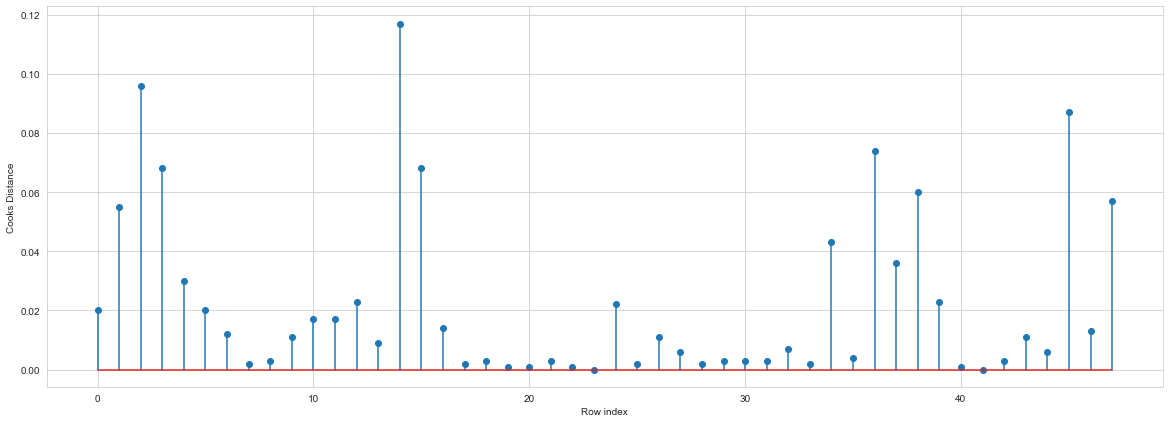

In [86]:
fig= plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(startupp)),np.round(c_V,3));
plt.xlabel('Row index')
plt.ylabel('Cooks Distance');

In [87]:
(np.argmax(c_V),np.max(c_V))

(14, 0.11654464976722385)

In [88]:
startupp1=startupp.drop(startupp.index[[14]],axis=0)

In [89]:
startupp1

,RDS,ADM,MARS,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94
5,131876.90,99814.71,362861.36,156991.12
6,134615.46,147198.87,127716.82,156122.51
7,130298.13,145530.06,323876.68,155752.60
8,120542.52,148718.95,311613.29,152211.77
9,123334.88,108679.17,304981.62,149759.96


In [90]:
st_up=startupp1.reset_index()

In [91]:
st_up1=st_up.drop(["index"],axis=1)

In [92]:
st_up1

,RDS,ADM,MARS,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94
5,131876.90,99814.71,362861.36,156991.12
6,134615.46,147198.87,127716.82,156122.51
7,130298.13,145530.06,323876.68,155752.60
8,120542.52,148718.95,311613.29,152211.77
9,123334.88,108679.17,304981.62,149759.96


In [94]:
final_model_adm=smf.ols('Profit~RDS+ADM',data=st_up1).fit()

In [95]:
model_influence_adm= final_model_adm.get_influence()
(c_V,_)=model_influence_adm.cooks_distance

<ipython-input-97-bf280e044ba7>:2: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(np.arange(len(st_up1)),np.round(c_V,3));


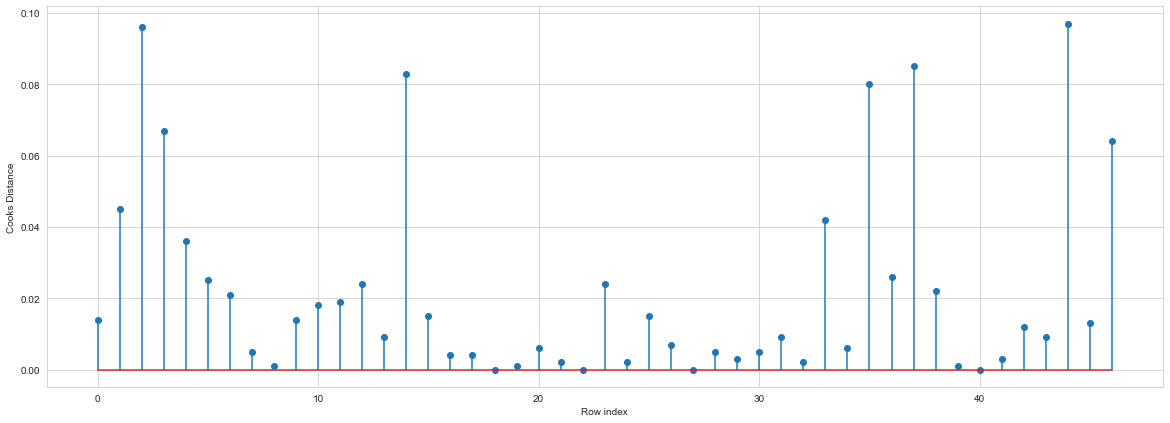

In [97]:
fig= plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(st_up1)),np.round(c_V,3));
plt.xlabel('Row index')
plt.ylabel('Cooks Distance');

In [98]:
(np.argmax(c_V),np.max(c_V))

(44, 0.09678650589187487)

Since the value is <1 , we can stop the diagnostic process 

In [103]:
final_model_=smf.ols('Profit~RDS+ADM',data=st_up1).fit()

In [104]:
(final_model_.rsquared,final_model_.aic)

(0.9653589410274203, 969.380034098345)

Predicting for new values

In [102]:
new_data=pd.DataFrame({'RDS':235674.09,'ADM':356752.78,'MARS':467345},index=[1])

In [105]:
final_model_.predict(new_data)

1    231700.266833
dtype: float64

In [107]:
final_model_.predict(startupp.iloc[0:5,])

0    188464.428401
1    185189.563454
2    181042.426466
3    172319.779638
4    172312.705258
dtype: float64

In [108]:
pred_y=final_model_.predict(startupp)

In [109]:
pred_y

0     188464.428401
1     185189.563454
2     181042.426466
3     172319.779638
4     172312.705258
5     163251.451757
6     162272.170087
7     158806.530873
8     150498.043612
9     155560.020437
10    137664.832788
11    137925.428191
12    129842.697373
13    127730.164599
14    149464.120009
15    147297.330711
16    117091.239873
17    129282.611001
18    128990.815567
19    121873.086226
20    116162.636319
21    115196.302110
22    113677.597018
23    109487.268138
24    117818.351749
25    104790.574124
26    113319.385692
27    111764.277802
28    102984.749282
29    104646.144927
30    104216.490446
31    100962.828784
32    104457.977946
33     99689.140193
34     88422.020501
35     93063.350946
36     75794.306934
37     93767.233204
38     72991.929416
39     87022.603692
40     76453.146271
41     78059.683394
42     73746.392423
43     64860.760436
44     68512.389643
45     53053.707557
46     53886.955022
47     51450.969717
dtype: float64